In [7]:
import pandas as pd

mspus = pd.read_csv("../data/raw/MSPUS.csv")
income = pd.read_csv("../data/raw/MEHOINUSA646N.csv")
hpi = pd.read_csv("../data/raw/USSTHPI.csv")

mspus.head()

,observation_date,MSPUS
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500


In [8]:
income.head()

,observation_date,MEHOINUSA646N
0,1984-01-01,22420
1,1985-01-01,23620
2,1986-01-01,24900
3,1987-01-01,26060
4,1988-01-01,27230


In [15]:
mspus.isna().any().any()


False

In [16]:
income.isna().any().any()

False

In [17]:
hpi.isna().any().any()

False

In [18]:
merged_nominal = pd.merge(mspus, income, on="observation_date", how="inner")
merged_nominal

,observation_date,MSPUS,MEHOINUSA646N
0,1984-01-01,78200,22420
1,1985-01-01,82800,23620
2,1986-01-01,88000,24900
3,1987-01-01,97900,26060
4,1988-01-01,110000,27230
5,1989-01-01,118000,28910
6,1990-01-01,123900,29940
7,1991-01-01,120000,30130
8,1992-01-01,119500,30640
9,1993-01-01,125000,31240


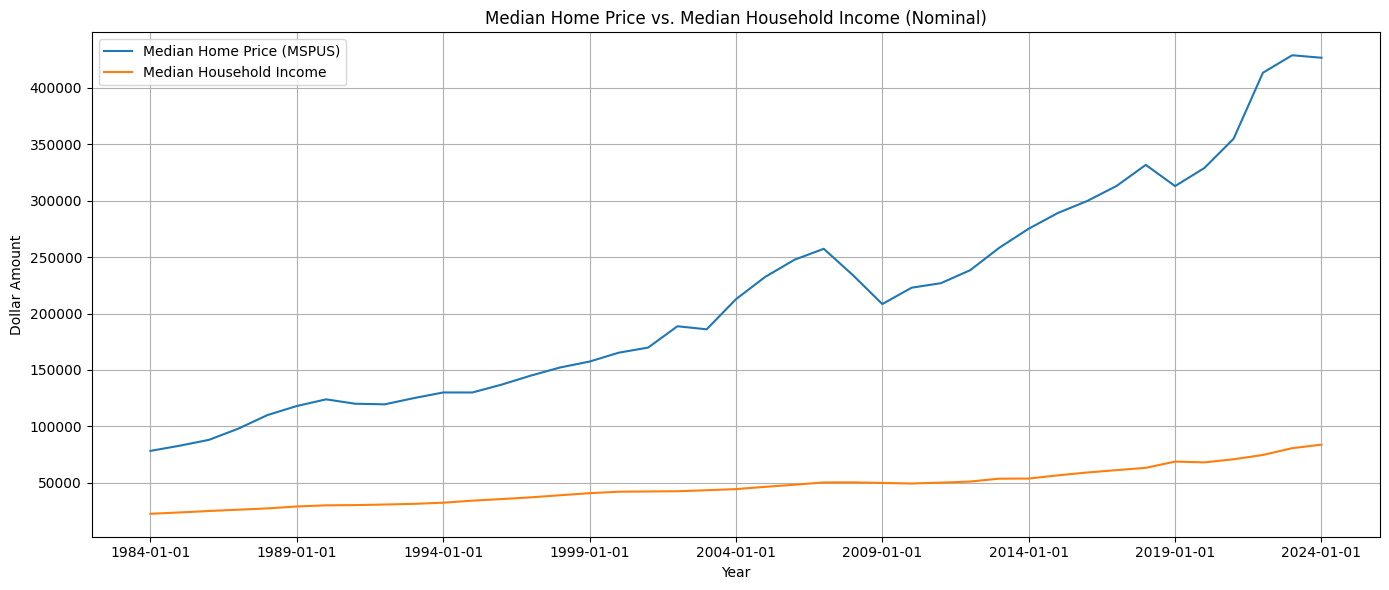

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(merged_nominal['observation_date'], merged_nominal['MSPUS'], label='Median Home Price (MSPUS)')
plt.plot(merged_nominal['observation_date'], merged_nominal['MEHOINUSA646N'], label='Median Household Income')

plt.title("Median Home Price vs. Median Household Income (Nominal)")
plt.xlabel("Year")
plt.ylabel("Dollar Amount")
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))   # show only ~10 ticks

plt.tight_layout()
plt.show()

